In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
data_path = "../raw_data/dynamism_data/bds2022_sec.csv"
merged = pd.read_csv(data_path)

In [4]:
merged = merged.rename(columns={'sector': 'NAICS'})

In [5]:
merged['firms_percent_destroyed'] = (merged['firmdeath_firms'] / merged['firms']) * 100

In [6]:
merged.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp',
       'firms_percent_destroyed'],
      dtype='object')

In [7]:
vars = [
    'job_creation_rate',
    'job_destruction_rate',
    'reallocation_rate', 
    'estabs_entry_rate', 
    'estabs_exit_rate', 
    'firms_percent_destroyed'
]

for var in vars:
    merged[f'{var}_3yr_avg'] = (
        merged
          .sort_values(['NAICS','year'])
          .groupby('NAICS')[var]
          .rolling(window=3, min_periods=1, center=True)
          .mean()
          .reset_index(level=0, drop=True)
    )

In [8]:
df_plot = (
    merged
      .groupby('year')[ 'job_creation_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

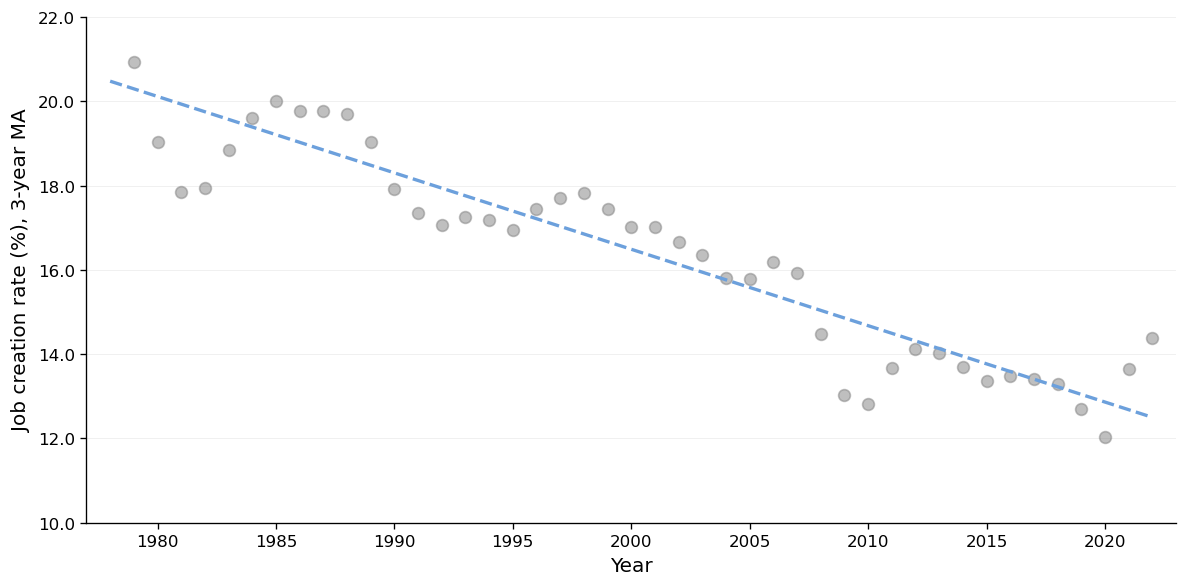

In [9]:
X = df_plot[['year']].values
y = df_plot['job_creation_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC',
)

min_year = df_plot['year'].min()
max_year = df_plot['year'].max()
start_year = min_year - (min_year % 5)
if start_year < min_year:
    start_year += 5
    
x_ticks = range(start_year, max_year + 6, 5)

ax.set_xticks(x_ticks)
ax.set_ylim(10, 22)
y_ticks = range(10, 24, 2) 
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}') 
ax.set_xlim(min_year - 1, max_year + 1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8) 
ax.spines['bottom'].set_linewidth(0.8)  

ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True) 

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job creation rate (%), 3-year MA', fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('../figures/job_creation_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
df_plot = (
    merged
      .groupby('year')[ 'job_destruction_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

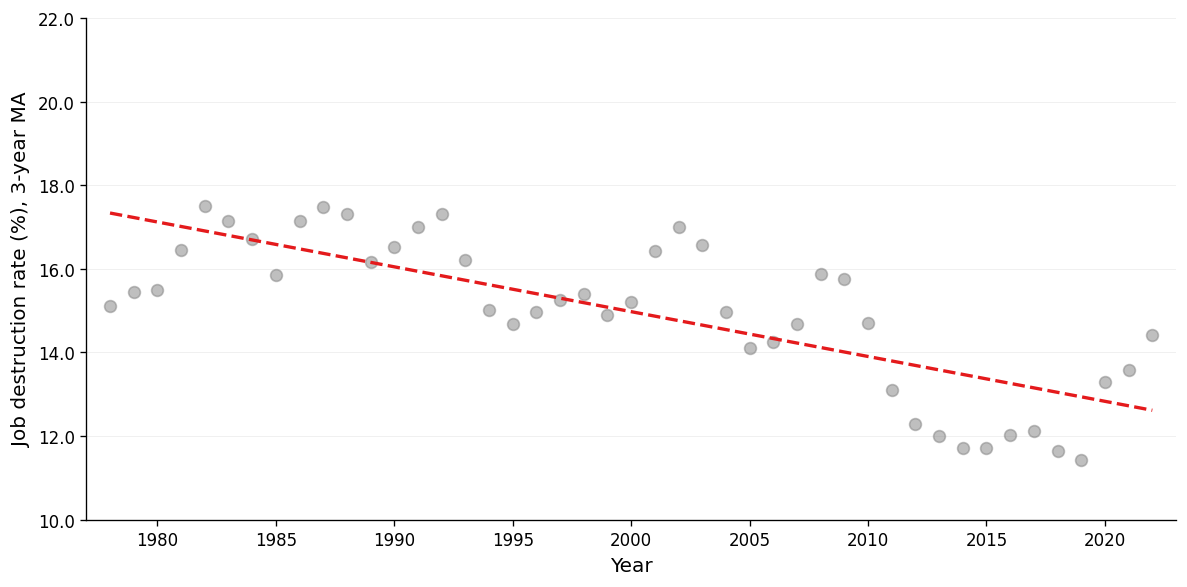

In [156]:
X = df_plot[['year']].values
y = df_plot['job_destruction_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# 4) Plot the trend line in red (no markers)
ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C',  # Keep the red color for destruction rate
)

# 5) Properly set x-ticks to avoid broken years
min_year = df_plot['year'].min()
max_year = df_plot['year'].max()
start_year = min_year - (min_year % 5)
if start_year < min_year:
    start_year += 5
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)

# 6) UPDATED: Fixed y-axis limits from 10 to 22
ax.set_ylim(10, 22)

# 7) UPDATED: Fixed y-ticks with increments of 2
y_ticks = range(10, 24, 2)  # 10, 12, 14, 16, 18, 20, 22
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# 8) Set appropriate x-axis limits to avoid cutoff
ax.set_xlim(min_year - 1, max_year + 1)

# 9) Single-axis "spine" style
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)  # Slightly thinner left spine
ax.spines['bottom'].set_linewidth(0.8)  # Slightly thinner bottom spine

# 10) Lighter, thinner horizontal gridlines only
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind data

# 11) Labels only on the axes (no title, no legend)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job destruction rate (%), 3-year MA', fontsize=12)

# 12) Ensure tick labels are clean and properly sized
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('../figures/job_destruction_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [157]:
# ── 3) Build an all-sector annual series of the smoothed net_job_creation_rate
df_plot = (
    merged
      .groupby('year')[ 'reallocation_rate_3yr_avg' ]
      .mean()
      .reset_index()
)

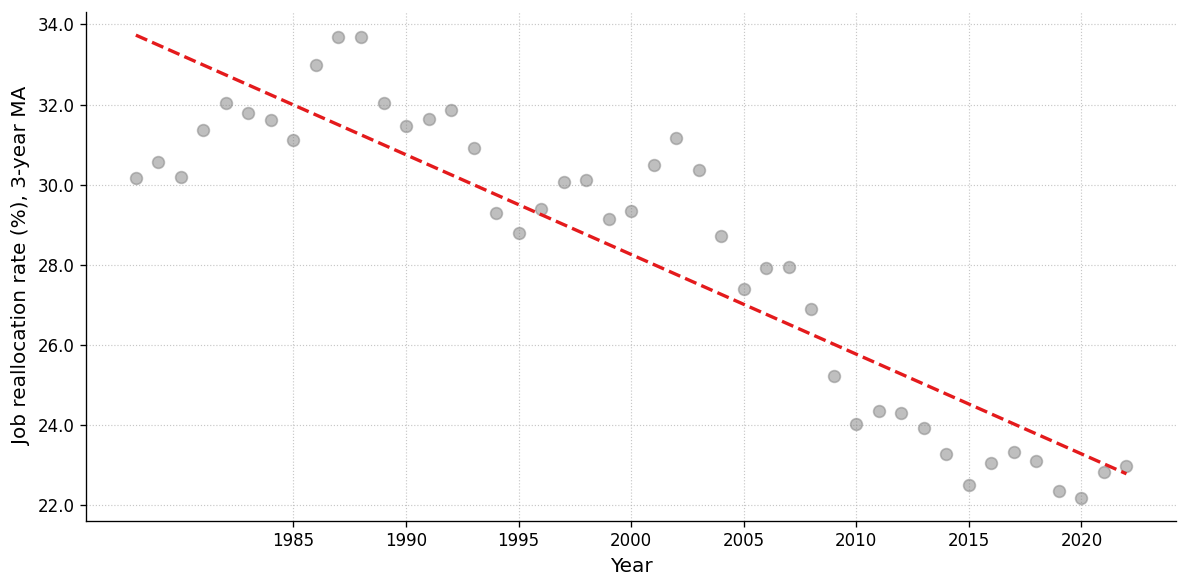

In [158]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 1) Fit the linear trend
X = df_plot[['year']].values
y = df_plot['reallocation_rate_3yr_avg'].values
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

# 2) Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# 3) Plot only the grey dots (no connecting lines)
ax.scatter(
    df_plot['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# 4) Plot the trend line in red (no markers)
ax.plot(
    df_plot['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C')

# 5) Dynamic y-ticks based on actual data range
y_min = np.floor(y.min())
y_max = np.ceil(y.max())
y_range = y_max - y_min
 
# Determine appropriate tick spacing based on range
if y_range <= 5:
    tick_spacing = 0.5  # For small ranges
elif y_range <= 10:
    tick_spacing = 1.0  # For medium ranges
else:
    tick_spacing = 2.0  # For large ranges

# Create dynamic ticks spanning from data minimum to maximum
y_ticks = np.arange(y_min, y_max + tick_spacing, tick_spacing)
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# Keep x-ticks as before
ax.set_xticks(range(1985, df_plot['year'].max()+1, 5))

# 6) Spine cleanup
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 7) Gridlines (behind data)
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# 8) Labels only on the axes (no title, no legend)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Job reallocation rate (%), 3-year MA', fontsize=12)

plt.tight_layout()
plt.savefig('../figures/job_reallocation_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [159]:
print(merged.columns)

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp',
       'firms_percent_destroyed', 'job_creation_rate_3yr_avg',
       'job_destruction_rate_3yr_avg', 'reallocation_rate_3yr_avg',
       'estabs_entry_rate_3yr_avg', 'estabs_exit_rate_3yr_avg',
       'firms_percent_destroyed_3yr_avg'],
      dtype='object')


In [160]:
# 2) DataFrame for firm deaths
df_plot = (
    merged
    .groupby('year')
    .agg({
        'estabs_exit_rate_3yr_avg': 'mean'  # or the appropriate column name for firm death rate
    })
    .reset_index()
)

In [161]:
df_plot.head(5)

,year,estabs_exit_rate_3yr_avg
0,1978,10.896053
1,1979,10.984982
2,1980,11.009158
3,1981,11.482947
4,1982,11.700772


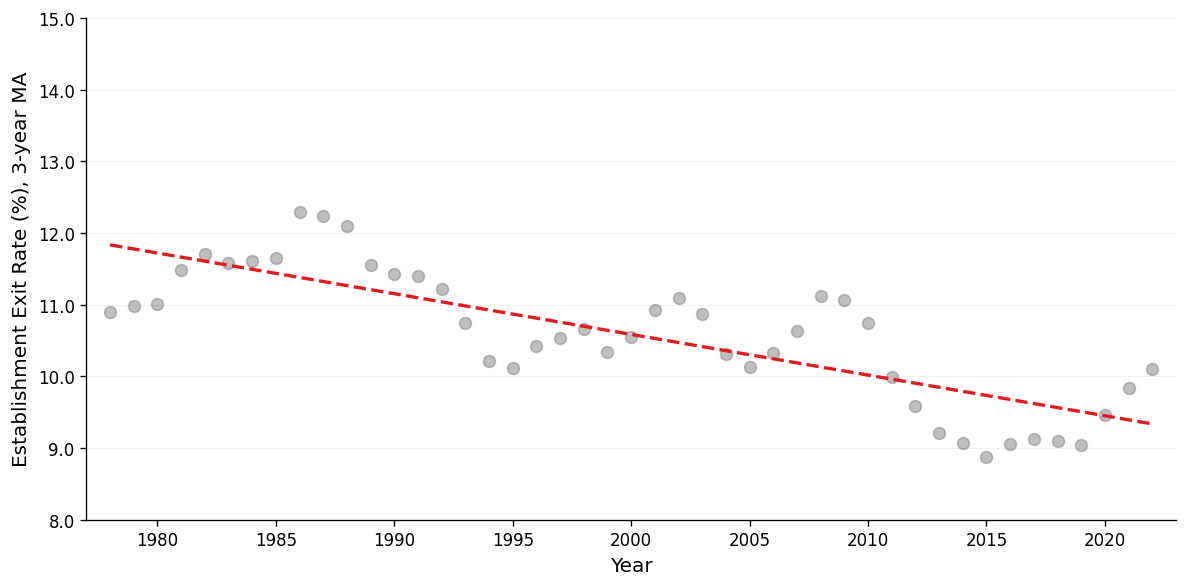

In [162]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# Get x-axis data
X = df_plot[['year']].values
years = df_plot['year']

# Plot establishment exit rate data points
ax.scatter(
    years,
    df_plot['estabs_exit_rate_3yr_avg'],
    s=50,
    color='grey',
    alpha=0.5
)

# Fit and plot trend line with red dashed line
y_estab = df_plot['estabs_exit_rate_3yr_avg'].values
model_estab = LinearRegression().fit(X, y_estab)
y_estab_trend = model_estab.predict(X)

ax.plot(
    years,
    y_estab_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C'  # Red color
)

# Get axis range info
min_year = min(years)
max_year = max(years)

# Set x-ticks starting from 1980 with 5-year intervals
start_year = 1980
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(min_year - 1, max_year + 1)  # Add padding

# FIXED Y-AXIS: Set y-axis limits from 8 to 15 as requested
ax.set_ylim(8, 15)

# Set y-ticks with 1.0 increments
y_ticks = np.arange(8, 15.1, 1.0)  # 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# Rename the y-axis label
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Establishment Exit Rate (%), 3-year MA', fontsize=12)

# Improve spine appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)  # Slightly thinner left spine
ax.spines['bottom'].set_linewidth(0.8)  # Slightly thinner bottom spine

# Improve gridlines (lighter, horizontal only)
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind data

# Ensure tick labels are clean and properly sized
ax.tick_params(axis='both', which='major', labelsize=10)

# Show plot
plt.tight_layout()
plt.savefig('../figures/estabs_exit_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [163]:
# 2) DataFrame for firm deaths
df_plot = (
    merged
    .groupby('year')
    .agg({
        'estabs_entry_rate_3yr_avg': 'mean'  # or the appropriate column name for firm death rate
    })
    .reset_index()
)

In [164]:
df_plot.head(5)

,year,estabs_entry_rate_3yr_avg
0,1978,14.762289
1,1979,14.234298
2,1980,13.652281
3,1981,13.192140
4,1982,13.314333


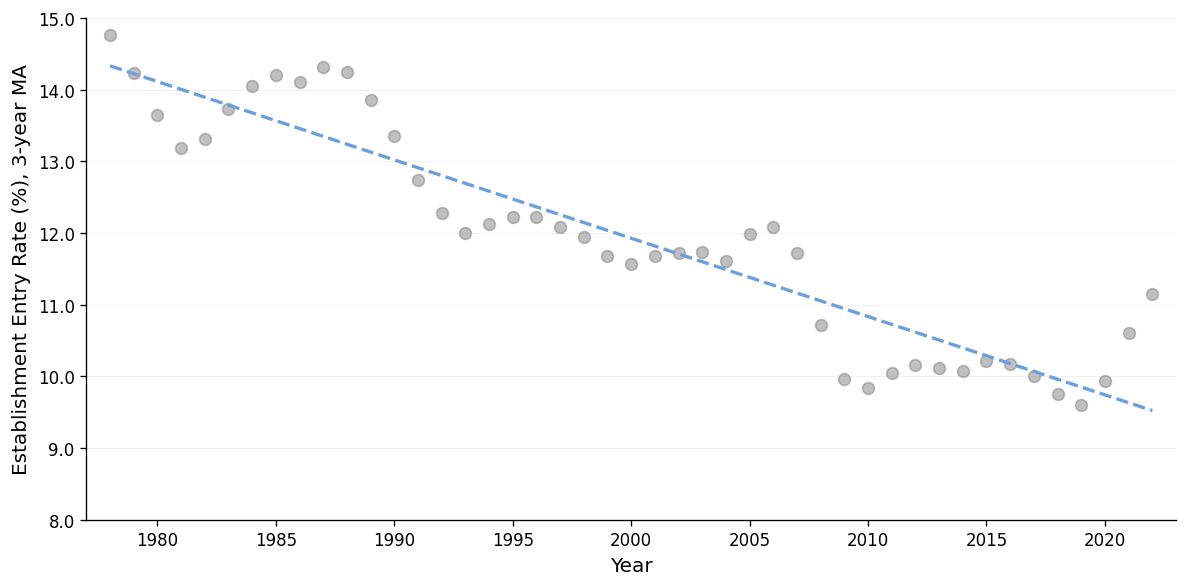

In [165]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# Get x-axis data
X = df_plot[['year']].values
years = df_plot['year']

# Plot establishment entry rate data points
ax.scatter(
    years,
    df_plot['estabs_entry_rate_3yr_avg'],
    s=50,
    color='grey',
    alpha=0.5
)

# Fit and plot trend line with blue dashed line
y_estab = df_plot['estabs_entry_rate_3yr_avg'].values
model_estab = LinearRegression().fit(X, y_estab)
y_estab_trend = model_estab.predict(X)

ax.plot(
    years,
    y_estab_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC'
)

# Get axis range info
min_year = min(years)
max_year = max(years)

# Set x-ticks starting from 1980 with 5-year intervals
start_year = 1980
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(min_year - 1, max_year + 1)  # Add padding

# FIXED Y-AXIS: Set y-axis limits from 8 to 15 as requested
ax.set_ylim(8, 15)

# Set y-ticks with 1.0 increments
y_ticks = np.arange(8, 15.1, 1.0)  # 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# Update the y-axis label for entry rate
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Establishment Entry Rate (%), 3-year MA', fontsize=12)

# Improve spine appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)

# Improve gridlines (lighter, horizontal only)
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)

# Ensure tick labels are clean and properly sized
ax.tick_params(axis='both', which='major', labelsize=10)

# Show plot
plt.tight_layout()
plt.savefig('../figures/estabs_entry_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [166]:
# 2) DataFrame for firm deaths
df_plot = (
    merged
    .groupby('year')
    .agg({
        'firms_percent_destroyed_3yr_avg': 'mean'  # or the appropriate column name for firm death rate
    })
    .reset_index()
)

In [167]:
df_plot.head(5)

,year,firms_percent_destroyed_3yr_avg
0,1978,8.466264
1,1979,8.723212
2,1980,8.971220
3,1981,9.552504
4,1982,9.577224


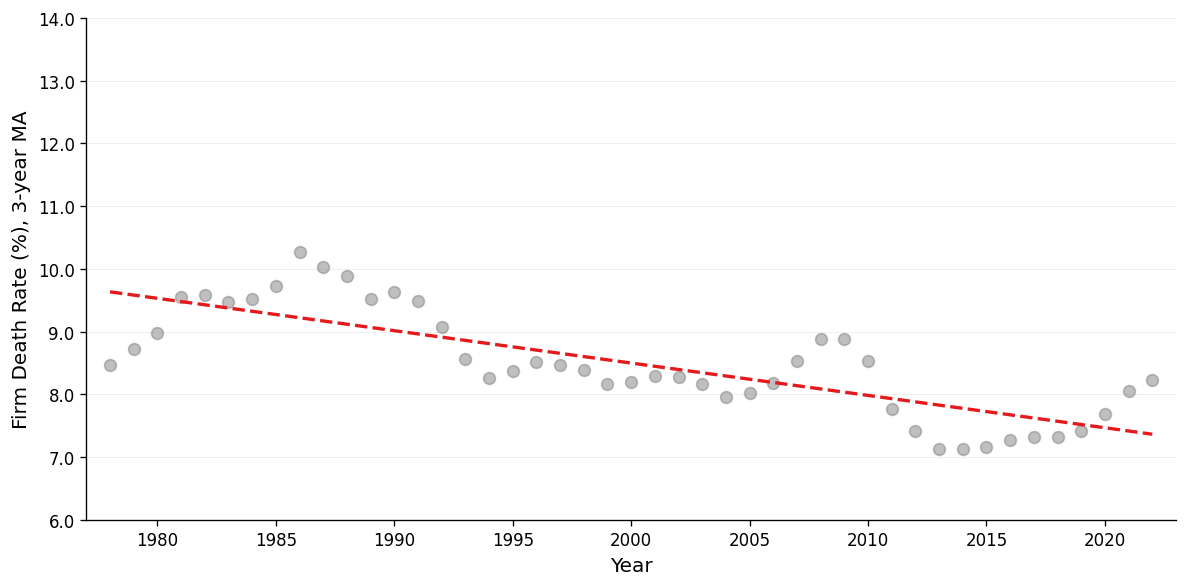

In [168]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Start the figure
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# Get x-axis data
X = df_plot[['year']].values
years = df_plot['year']

# Plot firm death rate data points
ax.scatter(
    years,
    df_plot['firms_percent_destroyed_3yr_avg'],
    s=50,
    color='grey',
    alpha=0.5
)

# Fit and plot trend line
y_firm = df_plot['firms_percent_destroyed_3yr_avg'].values
model_firm = LinearRegression().fit(X, y_firm)
y_firm_trend = model_firm.predict(X)

ax.plot(
    years,
    y_firm_trend,
    linestyle='--',
    linewidth=2,
    color='#E41A1C'  # Keep red for the trend line
)

# Get axis range info
min_year = min(years)
max_year = max(years)

# Set x-ticks starting from 1980 with 5-year intervals
start_year = 1980
x_ticks = range(start_year, max_year + 6, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(min_year - 1, max_year + 1)  # Add padding

# FIXED Y-AXIS: Set y-axis limits from 6 to 14 as requested
ax.set_ylim(6, 14)

# Set y-ticks with 1.0 increments
y_ticks = np.arange(6, 14.1, 1.0)  # 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# Labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Firm Death Rate (%), 3-year MA', fontsize=12)

# Improve spine appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)  # Slightly thinner left spine
ax.spines['bottom'].set_linewidth(0.8)  # Slightly thinner bottom spine

# Improve gridlines (lighter, horizontal only)
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind data

# Ensure tick labels are clean and properly sized
ax.tick_params(axis='both', which='major', labelsize=10)

# Show plot
plt.tight_layout()
plt.savefig('../figures/firm_death_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [169]:
data_path = "/Users/danielseymour/Developer/EC334-Summative/raw_data/dynamism_data/new_firms_df.csv"
new_firms = pd.read_csv(data_path)
new_firms.head()


,year,new_firms,total_firms,new_firm_rate
0,1978,486647.0,3558681.0,13.674926
1,1979,473380.0,3691766.0,12.822590
2,1980,439668.0,3739254.0,11.758174
3,1981,430123.0,3768275.0,11.414321
4,1982,418619.0,3741795.0,11.187652


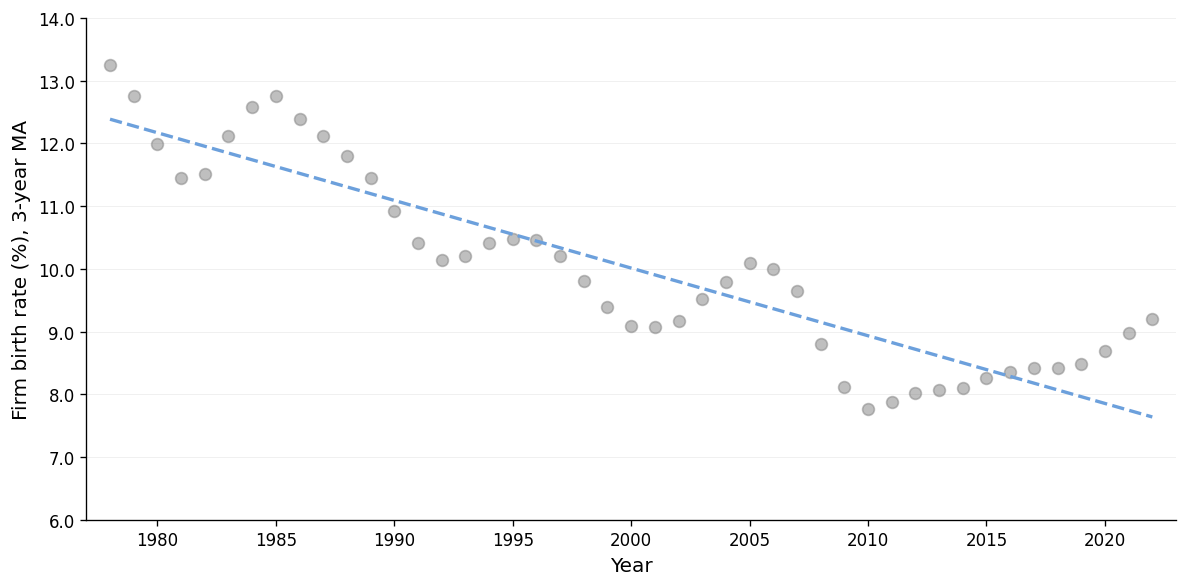

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Compute 3-year centered moving average for new_firm_rate
new_firms['new_firm_rate_3yr_avg'] = (
    new_firms
    .sort_values('year')
    .new_firm_rate
    .rolling(window=3, min_periods=1, center=True)
    .mean()
)

# Prepare data for plotting
X = new_firms[['year']].values
y = new_firms['new_firm_rate_3yr_avg'].values

# Fit linear trend
model = LinearRegression().fit(X, y)
y_trend = model.predict(X)

# Plot
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5), dpi=120)
ax.set_facecolor('white')

# Scatter plot of 3-year MA with grey dots
ax.scatter(
    new_firms['year'],
    y,
    s=50,
    color='grey',
    alpha=0.5,
)

# Trend line with light blue dashed line
ax.plot(
    new_firms['year'],
    y_trend,
    linestyle='--',
    linewidth=2,
    color='#6CA0DC',
)

# Get axis range info
min_year = new_firms['year'].min()
max_year = new_firms['year'].max()

# Set x-ticks starting from 1980 with 5-year intervals
start_year = 1980
x_ticks = range(start_year, int(max_year) + 6, 5)
ax.set_xticks(x_ticks)
ax.set_xlim(min_year - 1, max_year + 1)  # Add padding

# FIXED Y-AXIS: Set y-axis limits from 6 to 14 as requested
ax.set_ylim(6, 14)

# Set y-ticks with 1.0 increments
y_ticks = np.arange(6, 14.1, 1.0)  # 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0
ax.set_yticks(y_ticks)
ax.yaxis.set_major_formatter('{x:.1f}')  # show one decimal place

# Improve spine appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)  # Slightly thinner left spine
ax.spines['bottom'].set_linewidth(0.8)  # Slightly thinner bottom spine

# Improve gridlines (lighter, horizontal only)
ax.grid(which='major', axis='y', linestyle='-', linewidth=0.4, color='#E0E0E0', alpha=0.7)
ax.set_axisbelow(True)  # Ensure grid is behind data

# Labels
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Firm birth rate (%), 3-year MA', fontsize=12)

# Ensure tick labels are clean and properly sized
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig('../figures/firm_birth_rate_trend.png', dpi=300, bbox_inches='tight')
plt.show()

In [171]:
merged.head()

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,firmdeath_firms,firmdeath_estabs,firmdeath_emp,firms_percent_destroyed,job_creation_rate_3yr_avg,job_destruction_rate_3yr_avg,reallocation_rate_3yr_avg,estabs_entry_rate_3yr_avg,estabs_exit_rate_3yr_avg,firms_percent_destroyed_3yr_avg
0,1978,11,20358,21019,185795,178798,4011,19.226,3698,17.726,...,2690,2715,12047,13.213479,29.4645,26.0520,51.2955,18.3580,17.7000,13.142916
1,1978,21,19105,24709,708633,710248,3948,16.224,3199,13.146,...,1747,1783,16712,9.144203,25.8865,19.0120,37.5635,16.4750,12.7820,9.276680
2,1978,22,5681,11859,658516,643489,928,7.946,567,4.855,...,215,217,1820,3.784545,10.9365,6.9165,13.8335,7.2580,4.6965,3.683091
3,1978,23,426309,431986,4095927,3822634,91838,22.160,56730,13.689,...,43833,43872,190035,10.281979,33.3605,20.9715,41.9435,20.6410,14.0355,10.673890
4,1978,31-33,263909,311911,18324614,17892952,33616,10.894,26929,8.727,...,18993,19135,224138,7.196799,13.2550,8.8075,17.6145,10.5425,9.1025,7.292728


In [172]:
# ── 1) Define the rate columns you want to smooth
vars = [
    'job_creation_rate',
    'job_destruction_rate',
    'reallocation_rate', 
    'estabs_entry_rate', 
    'estabs_exit_rate', 
    'firms_percent_destroyed'
]

# ── 2) Compute 3-year centered moving averages within each sector
for var in vars:
    merged[f'{var}_2yr_avg'] = (
        merged
          .sort_values(['NAICS','year'])
          .groupby('NAICS')[var]
          .rolling(window=2, min_periods=1, center=True)
          .mean()
          .reset_index(level=0, drop=True)
    )

In [173]:
merged.columns

Index(['year', 'NAICS', 'firms', 'estabs', 'emp', 'denom', 'estabs_entry',
       'estabs_entry_rate', 'estabs_exit', 'estabs_exit_rate', 'job_creation',
       'job_creation_births', 'job_creation_continuers',
       'job_creation_rate_births', 'job_creation_rate', 'job_destruction',
       'job_destruction_deaths', 'job_destruction_continuers',
       'job_destruction_rate_deaths', 'job_destruction_rate',
       'net_job_creation', 'net_job_creation_rate', 'reallocation_rate',
       'firmdeath_firms', 'firmdeath_estabs', 'firmdeath_emp',
       'firms_percent_destroyed', 'job_creation_rate_3yr_avg',
       'job_destruction_rate_3yr_avg', 'reallocation_rate_3yr_avg',
       'estabs_entry_rate_3yr_avg', 'estabs_exit_rate_3yr_avg',
       'firms_percent_destroyed_3yr_avg', 'job_creation_rate_2yr_avg',
       'job_destruction_rate_2yr_avg', 'reallocation_rate_2yr_avg',
       'estabs_entry_rate_2yr_avg', 'estabs_exit_rate_2yr_avg',
       'firms_percent_destroyed_2yr_avg'],
      dtype=

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define weighted average function
def weighted_avg(values, weights):
    # Make sure values and weights are numeric
    values = pd.to_numeric(values, errors='coerce')
    weights = pd.to_numeric(weights, errors='coerce')
    
    # Drop NaN values
    mask = ~(np.isnan(values) | np.isnan(weights))
    values = values[mask]
    weights = weights[mask]
    
    # Return weighted average
    return np.average(values, weights=weights) if len(values) > 0 else np.nan

# Group and calculate weighted averages
national = pd.DataFrame()
for year, group in merged.groupby("year"):
    firm_entry = weighted_avg(
        group["job_creation_rate_3yr_avg"], 
        group["weight"]
    )
    estab_entry = weighted_avg(
        group["estabs_entry_rate_3yr_avg"], 
        group["weight"]
    )
    
    # Append to the result DataFrame
    national = pd.concat([
        national, 
        pd.DataFrame({
            "year": [year],
            "firm_entry_wt": [firm_entry],
            "estab_entry_wt": [estab_entry]
        })
    ])

# Reset index and sort by year
national = national.reset_index(drop=True).sort_values("year")

KeyError: 'weight'

In [ ]:
national.head()

,year,firm_entry_wt,estab_entry_wt
0,1987,18.480260,13.498019
1,1988,18.245679,13.342766
2,1989,17.556507,12.935218
3,1990,16.432551,12.571759
4,1991,15.766946,11.935630


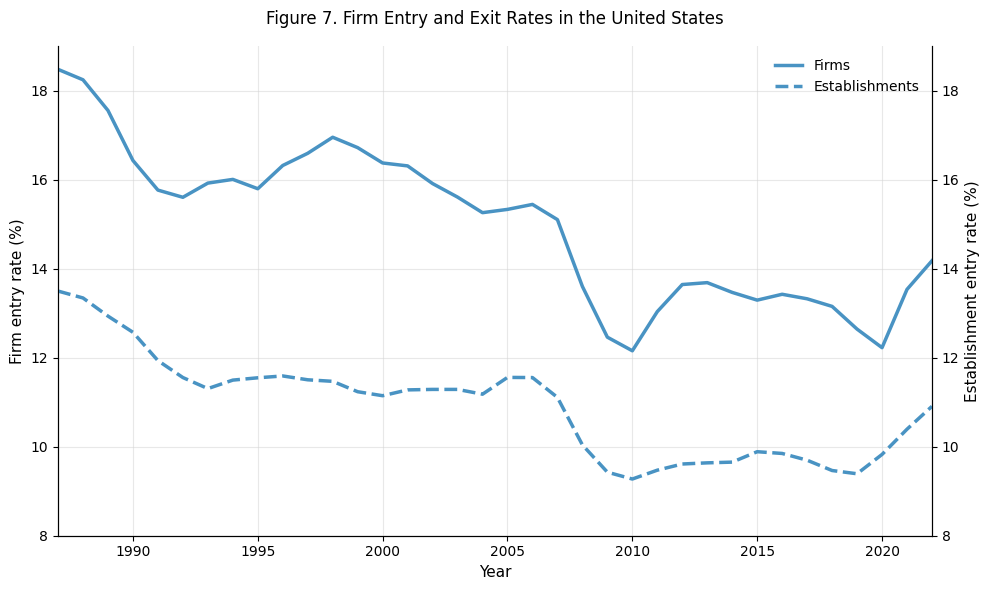

In [ ]:
# Plot with solid grid lines, no top border, and y-axis starting from 8%
fig, ax1 = plt.subplots(figsize=(10, 6))

# solid light blue: weighted firm entry
ax1.plot(
    national["year"],
    national["firm_entry_wt"],
    linestyle="-",  # solid line
    linewidth=2.5,
    color="#4993C3",  # light blue color
    label="Firms"
)
ax1.set_ylabel("Firm entry rate (%)", fontsize=11)
ax1.set_xlabel("Year", fontsize=11)

# Set axis ranges - start y-axis from 8% for more whitespace
y_min = 8  # Lower floor to 8%
y_max = 19  # Ceiling at 19%
ax1.set_ylim(y_min, y_max)
ax1.set_xlim(national["year"].min(), national["year"].max())

# dashed light blue: weighted establishment entry
ax2 = ax1.twinx()
ax2.plot(
    national["year"],
    national["estab_entry_wt"],
    linestyle="--",  # dashed line
    linewidth=2.5,
    color="#4993C3",  # same light blue color
    label="Establishments"
)
ax2.set_ylabel("Establishment entry rate (%)", fontsize=11)
ax2.set_ylim(y_min, y_max)  # Match the same scale as ax1

# Move legend to upper right
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper right", frameon=False)

# Add solid grid lines (not dotted)
ax1.grid(True, linestyle='-', color='lightgray', alpha=0.5)

# Make right, bottom, and left spines visible, but remove top spine
ax1.spines["top"].set_visible(False)
ax2.spines["top"].set_visible(False)

# Make sure bottom, left, and right spines are visible
for spine in ["bottom", "left", "right"]:
    ax1.spines[spine].set_visible(True)
    ax2.spines[spine].set_visible(True)

# Set specific tick intervals
ax1.set_yticks(range(8, 20, 2))  # 8, 10, 12, 14, 16, 18
ax2.set_yticks(range(8, 20, 2))  # Match left axis

# plt.title("Firm and Establishment Entry Rates in the United States", pad=16, fontsize=12)
plt.tight_layout()

# Save the figure
# plt.savefig("firm_establishment_entry_rates.png", dpi=300, bbox_inches="tight")
plt.show()